<span style="font-family:Cambria;"><span style="font-size:17px;"> **In this case, we have a dataset of train and test data about water feasibility test. There are 38 response variable and 1 dependent variable. We are expected to predict water feasibility based on dataset test.**
          

## 1. Import Library 📕

In [1]:
#Basic Library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Data Processing
from sklearn import linear_model
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error as MSE
from xgboost import XGBRegressor

#Data Visualization
import missingno as mso
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load Data 💾

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/water-feasibility-prediction-gammafest/sample_submission.csv
/kaggle/input/water-feasibility-prediction-gammafest/train.csv
/kaggle/input/water-feasibility-prediction-gammafest/test.csv


In [3]:
# Make Dataframe
train = pd.read_csv('../input/water-feasibility-prediction-gammafest/train.csv')
test = pd.read_csv('../input/water-feasibility-prediction-gammafest/test.csv')

In [4]:
# Show the train table
train.head()

,id,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,...,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
0,1,11,2,16.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,1,12.0,60.0,Layak Minum
1,2,11,2,31.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,2,31.0,70.0,Layak Minum
2,3,11,2,12.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,4,11.0,75.0,Layak Minum
3,6,11,2,12.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,NaN,1.0,0.0,1.0,1,11.0,85.0,Layak Minum
4,7,11,2,12.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2,11.0,65.0,Layak Minum


<span style="font-family:cambria;">
    <span style="font-size:17px;">
        <center>
<div class="alert alert-block alert-warning">  
</b> Remember there are missing values inside the data!
</div>
        <\center>
</span>

<span style="font-family:cambria;">
    <span style="font-size:16px;">

Here we show the percentage of missing values in every column

</span>

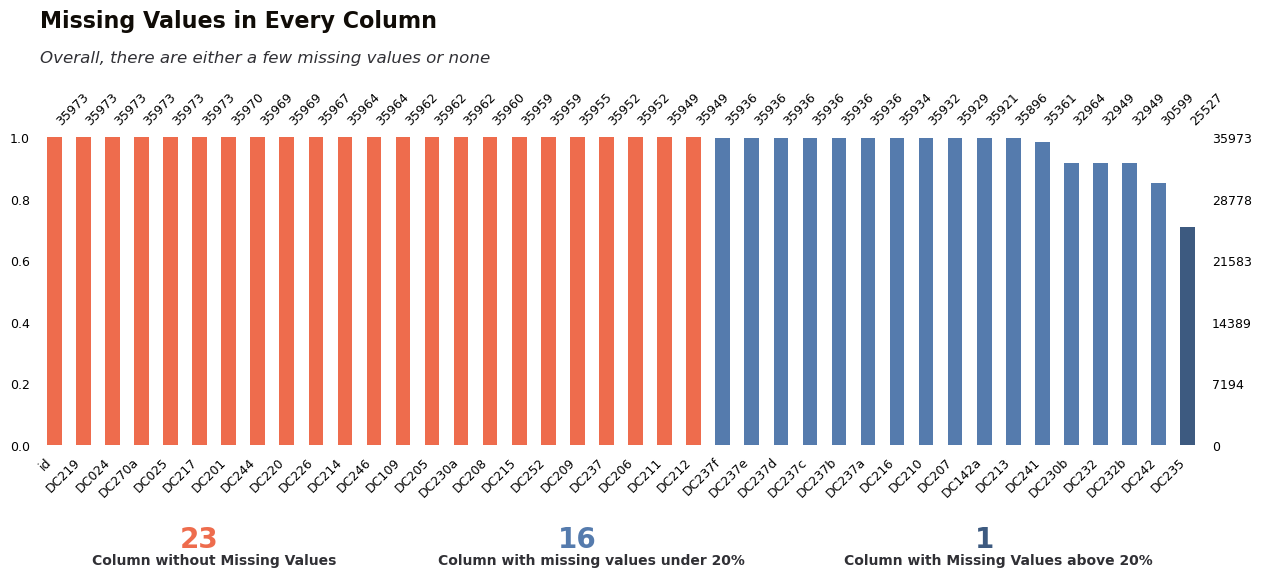

In [5]:
# Missing No Data Frame 
train_isnull = train.isnull().sum()
train_isnull = pd.DataFrame({'Column Name':train_isnull.index, 'Total':train_isnull.values})

# Iterate Variable
color_mso = ['#EE6C4D','#EE6C4D','#EE6C4D','#EE6C4D','#EE6C4D','#EE6C4D','#EE6C4D','#EE6C4D','#EE6C4D','#EE6C4D','#EE6C4D'
            ,'#EE6C4D','#EE6C4D','#EE6C4D','#EE6C4D','#EE6C4D','#EE6C4D','#EE6C4D','#EE6C4D','#EE6C4D','#EE6C4D','#EE6C4D'
            ,'#EE6C4D','#557BAD','#557BAD','#557BAD','#557BAD','#557BAD','#557BAD','#557BAD','#557BAD','#557BAD','#557BAD'
            ,'#557BAD','#557BAD','#557BAD','#557BAD','#557BAD','#557BAD','#3D5A80']
with_values = 23
more_values = 16
less_values = 1

# Plotting Missing Values
mso.bar(train, fontsize=9, color=color_mso, figsize=(15, 4), sort='descending', labels=True)
plt.suptitle('Missing Values in Every Column', fontweight='heavy', x=0.125, y=1.2, ha='left',fontsize=16, fontfamily='sans-serif', color='#100C07')
plt.title('Overall, there are either a few missing values or none', style='oblique', fontsize=12, color='#303035', loc='left', pad=20)
plt.text(5, -0.35, with_values, color='#EE6C4D', fontsize=20, ha='center', weight='bold', va='bottom')
plt.text(5.5, -0.35, 'Column without Missing Values', color='#303035', fontsize=10, ha='center', va='top', weight='bold')
plt.text(18, -0.35, more_values, color='#557BAD', fontsize=20, ha='center', weight='bold', va='bottom')
plt.text(18.5, -0.35, 'Column with missing values under 20%', color='#303035', fontsize=10, ha='center', va='top', weight='bold')
plt.text(32, -0.35,less_values, color='#3D5A80', fontsize=20, ha='center', weight='bold', va='bottom')
plt.text(32.5, -0.35, 'Column with Missing Values above 20%', color='#303035', fontsize=10, ha='center', va='top', weight='bold')
plt.grid(axis='both', alpha=0);

<span style="font-family:cambria;">
    <span style="font-size:17px;">
<div class="alert alert-block alert-info">
</b> Missing values can cause a misleading result. Therefore, we should modify the data. 
    In this notebook, i choose to drop a row with missing values.
</div>
    <\span>
      

In [6]:
# Delete Row with Missing Values
train = train.dropna()

In [7]:
# Slice Train and Test Data for response and dependent variable
y_train = train.iloc[:, 39]
X_train = train.iloc[:, 1:39]
X_test = test.iloc[:, 1:39]

The data of *y_train* is a categorical data. It is made of string.
Before we can process the data, we should convert the string to binary number using LabelEncoder.

In [8]:
# Convert String to Binary Number
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

## 3. Modelling 💻

<span style="font-family:cambria;">
    <span style="font-size:16px;">
    <span style="color:crimson;">XGBoost or Extreme Gradient Boosting </span> is a machine learning library for regression, classification, and ranking problem. XGboost algorithm train a model to find pattern then used it to predict a new data.

There are two models, trees and linear. XGBoost Trees is the basic one. It uses decision trees to find the most correct model. 

XGBoost is highly efficient. It works by combine a weak model into another weak model to create a strong model. Gradient boosting forming a model that can be used to predict with minimum errors.
</span>

In [9]:
# Define Model with XGBoost
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

## 4. Predict Train Data

In [10]:
# Predict the Train Data
y_pred = model.predict(X_train)
y_pred = abs(y_pred)

## 5. Analysis Metrics 

<span style="font-family:cambria;">
    <span style="font-size:16px;">
To decide the performance of model in regression analysis, there are four metrics that we can use to evaluate.

* **<span style="color:navy;">R-Squared**
        
  represents the proportion of the variance in the dependent variable which is explained by the linear regression model. The maximum value of R-Squared is 1(one). It tells how well the predictor variables can explain the variation in the response variable. The closer it approaches the value of 1, the better the model is.
  
* **<span style="color:navy;">Mean Squared Error (MSE)**
        
  represents average of the squared difference between the original and predicted values in the dataset. Lower value means better model.
  
* **<span style="color:navy;">Mean Absolute Error (MAE)**
        
  represents the average of the absolute difference between the actual and predicted values in the dataset. Lower value means better model.
  
* **<span style="color:navy;">Root Mean Squared Error (RMSE)**
        
  represents the square root of Mean Squared Error. It tells how well a regression model can predict the value of a response variable in absolute terms. Lower value means better model.

***

In [11]:
# R-Squared of Coefficient of Determination
r_squared= model.score(X_train,y_train)
print("R-Squared = ",r_squared)
# Define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# Evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = abs(scores)
print('MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )
# RMSE Computation
mse = MSE(y_train, y_pred)
rmse = np.sqrt(MSE(y_train, y_pred))
print("MSE : % f" %(mse))
print("RMSE : % f" %(rmse))

R-Squared =  0.6290514842036168
MAE: 0.166 (0.004)
MSE :  0.038736
RMSE :  0.196815


<span style="font-family:cambria;"><span style="font-size:16px;">**The number shows a very good sign as it is very low. We can conclude that the model is a good fit for the dataset.**

***

<span style="font-family:cambria;"><span style="font-size:16px;">**Correlation** indicate a relationship between two variables. Correlation exist in numbers ranging from -1 to 1. If the correlation close to 1(one), then the stronger the relationship between variables.
**Positive** correlation indicates the extent to which the variable increases or decreases in parallel. **Negative** correlation indicates the extent to which one variable increases as the other decreases.

In [12]:
# Correlation between Response Variables 
X_train.corr()

,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,...,DC237e,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a
DC024,1.000000,0.129035,0.069066,-0.066655,-0.068745,-0.174754,-0.120895,-0.110170,-0.165046,-0.041033,...,0.001044,0.117635,NaN,-0.160163,0.164532,0.075876,0.037186,-0.170851,0.092325,-0.025841
DC025,0.129035,1.000000,0.207196,-0.115032,-0.138483,-0.189510,-0.281785,-0.122368,-0.110559,-0.134533,...,-0.000337,0.127377,NaN,-0.016892,0.408482,0.294123,0.024722,0.006920,0.227271,-0.053225
DC205,0.069066,0.207196,1.000000,-0.186889,-0.089321,-0.271870,-0.317430,-0.132752,-0.202401,-0.153041,...,-0.007037,0.052476,NaN,-0.065032,0.066508,0.057991,0.010831,-0.417081,0.876124,-0.133768
DC206,-0.066655,-0.115032,-0.186889,1.000000,0.047212,0.309260,0.182016,0.078216,0.190805,0.059007,...,0.002210,-0.013704,NaN,0.048238,-0.063722,-0.040109,0.012112,0.198132,-0.220235,0.064321
DC207,-0.068745,-0.138483,-0.089321,0.047212,1.000000,0.099727,0.121878,0.143714,0.084308,0.104996,...,-0.004648,-0.010800,NaN,0.034041,-0.048065,-0.011182,-0.004738,0.191305,-0.097025,0.071080
DC208,-0.174754,-0.189510,-0.271870,0.309260,0.099727,1.000000,0.373199,0.193543,0.355782,0.131857,...,-0.002486,-0.043038,NaN,0.052092,-0.104711,-0.056891,0.012072,0.407574,-0.305954,0.127904
DC209,-0.120895,-0.281785,-0.317430,0.182016,0.121878,0.373199,1.000000,0.182610,0.346551,0.275071,...,0.000394,-0.096842,NaN,0.067031,-0.106009,-0.118665,-0.004888,0.603611,-0.337112,0.178063
DC210,-0.110170,-0.122368,-0.132752,0.078216,0.143714,0.193543,0.182610,1.000000,0.196268,0.148945,...,0.006634,-0.030265,NaN,0.040128,-0.040451,0.008082,-0.000772,0.314255,-0.135586,0.104037
DC211,-0.165046,-0.110559,-0.202401,0.190805,0.084308,0.355782,0.346551,0.196268,1.000000,0.151878,...,0.010513,-0.058455,NaN,0.041672,-0.000432,0.020752,0.018595,0.444537,-0.210094,0.105804
DC212,-0.041033,-0.134533,-0.153041,0.059007,0.104996,0.131857,0.275071,0.148945,0.151878,1.000000,...,-0.008421,-0.069696,NaN,0.034010,0.022695,-0.090967,-0.006055,0.448196,-0.153899,0.203929


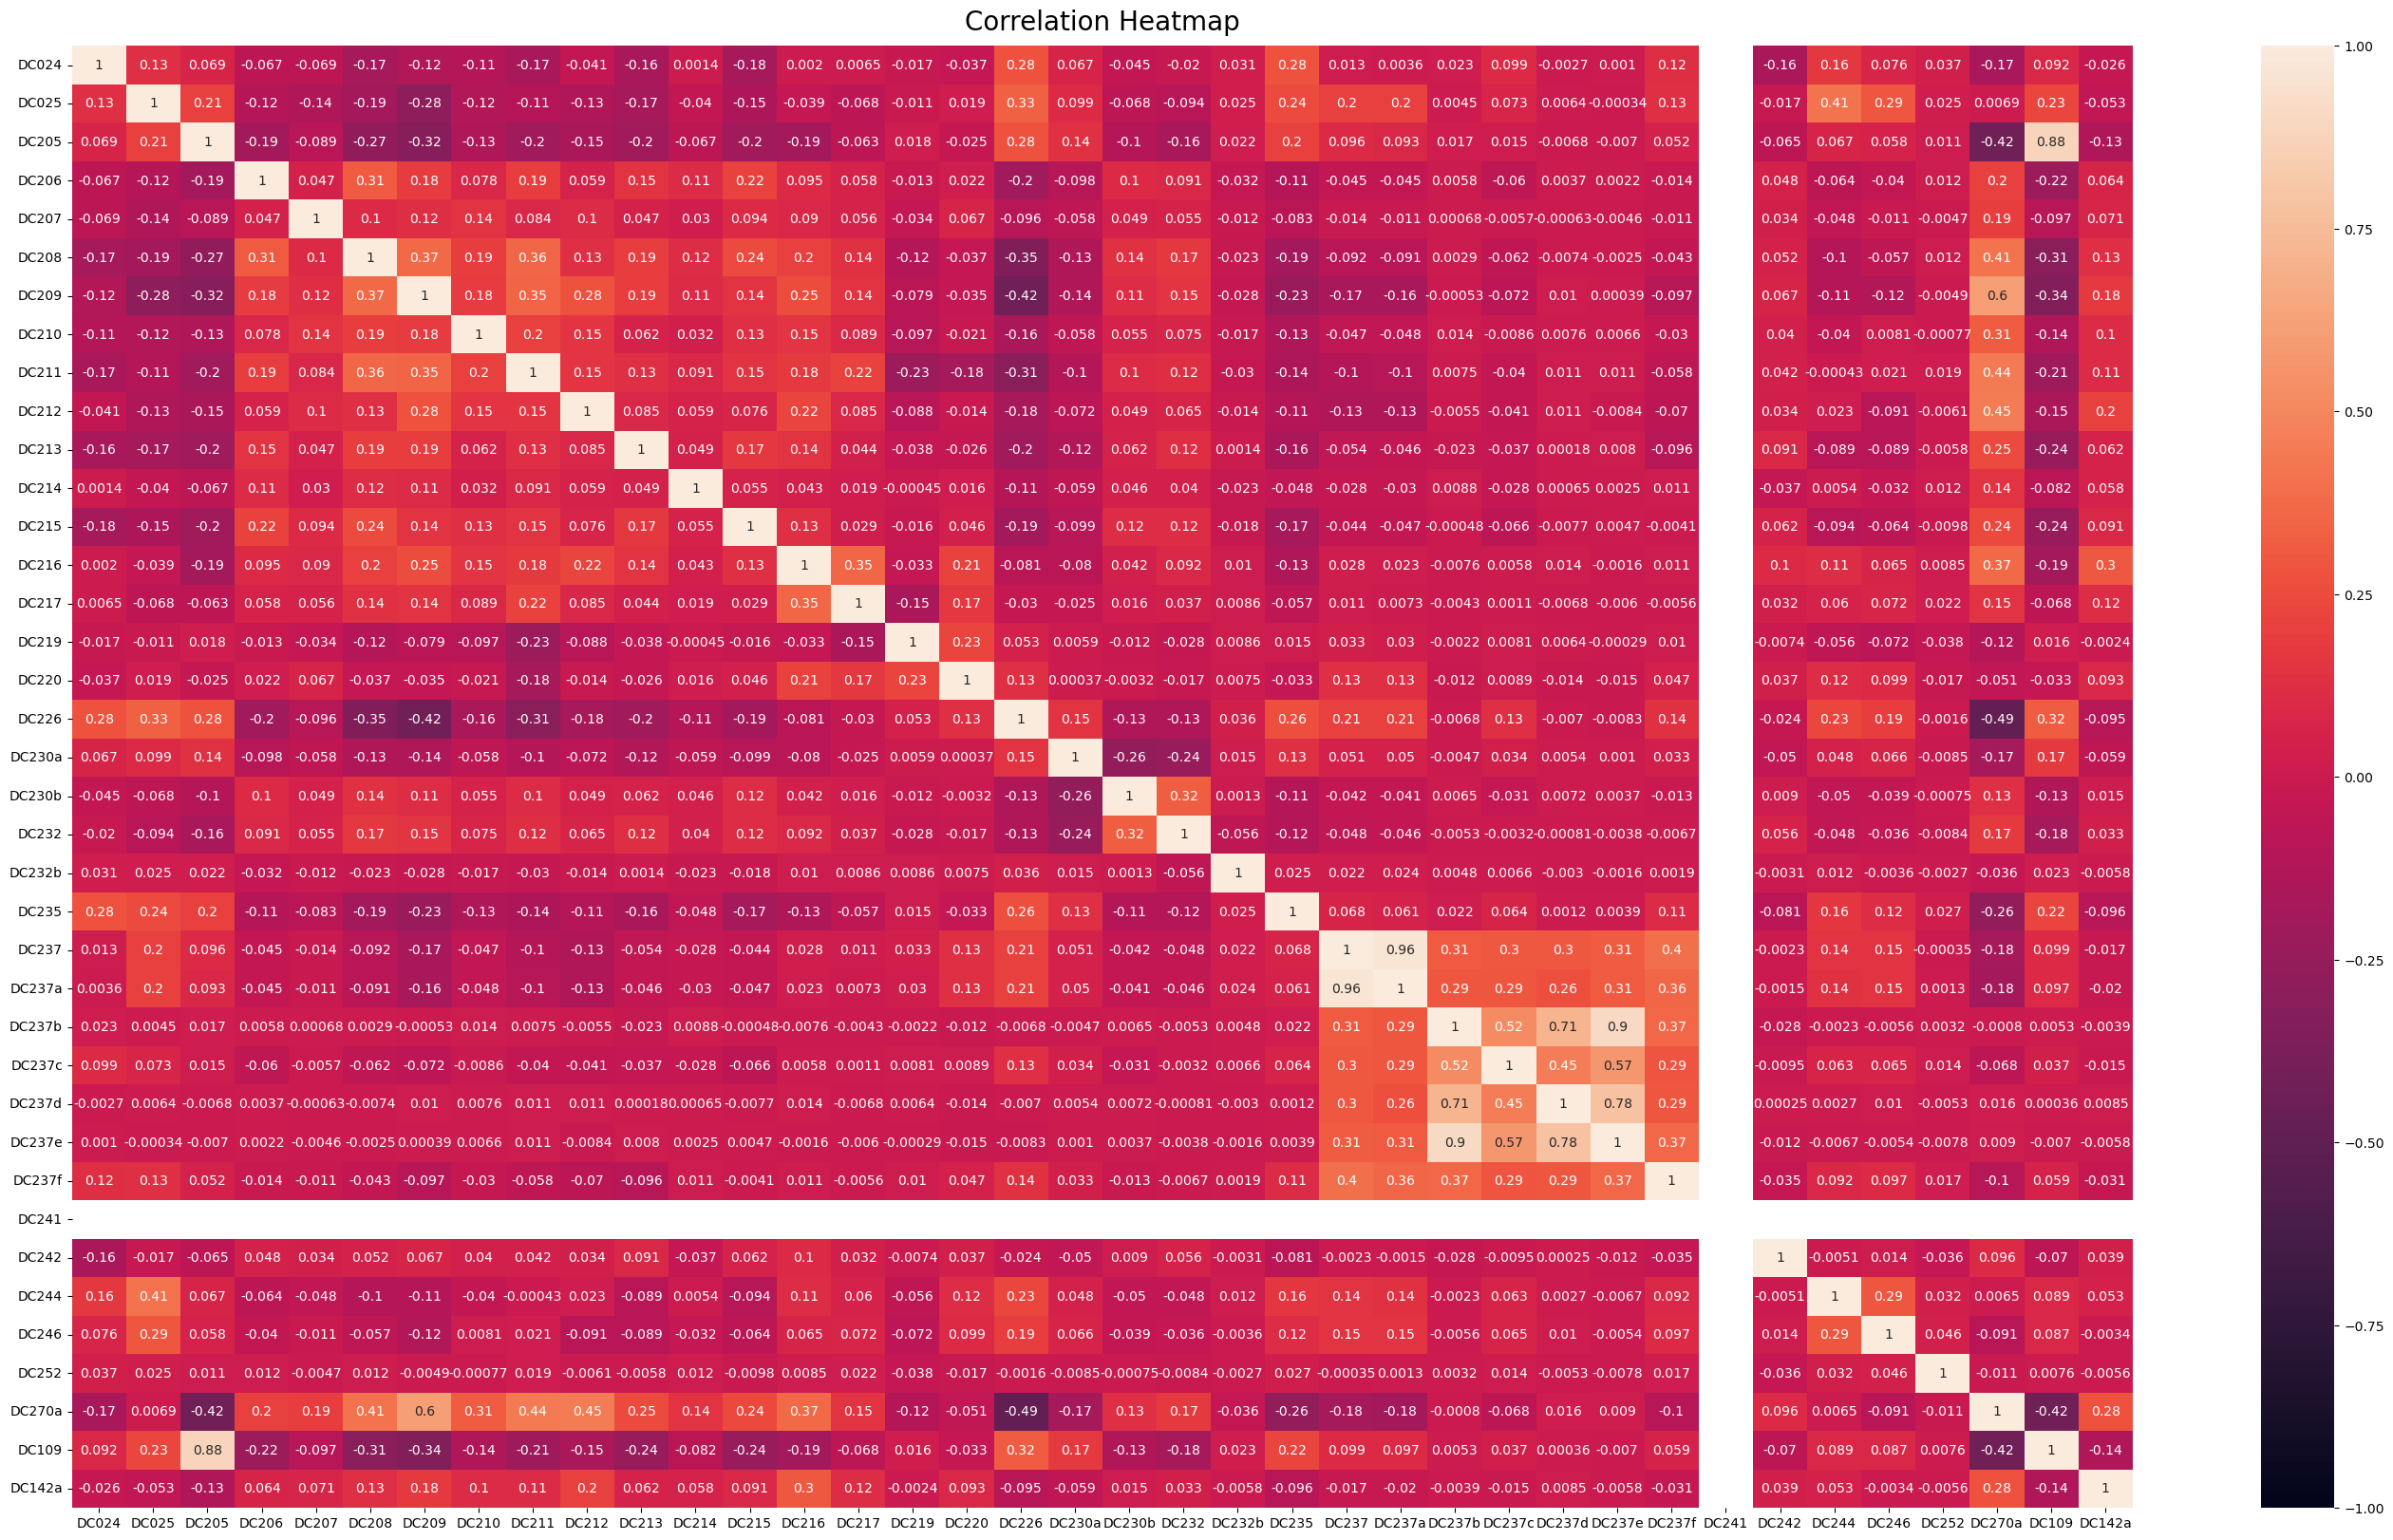

In [13]:
# Make Correlation Heatmap 
plt.figure(figsize=(35, 20))
heatmap = sns.heatmap(X_train.corr(),annot=True,vmin=-1,vmax=1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

<span style="font-family:cambria;"><span style="font-size:16px;">**As it shown above, the correlation between DC237 and DC237a is very high as it close to 1(one). On the contrary, the correlation between DC237 and DC024 is very low with only 0.013. Hence, if DC237 increases, then DC237a increases as it is strongly influenced and DC024 also increases but not to affected.**

***

## 6. Predict Test Data

In [14]:
# Predict the Test Data
y_pred2 = model.predict(X_test)
y_pred2 = abs(y_pred2)

In [15]:
# The result is in float. Because the result is either 0 or 1, we should round the predicted data.
rounded = [round(i) for i in y_pred2]

In [16]:
# Mapping 0 and 1 into string 

# Make empty array named DC201
DC201 = np.array([])

for i in rounded:
    if i == 0:
        i = "Layak Minum"
        DC201 = np.append(DC201, i)
    else:
        i = "Tidak Layak Minum"
        DC201 = np.append(DC201, i)
        
# Display result
DC201

array(['Layak Minum', 'Layak Minum', 'Layak Minum', ..., 'Layak Minum',
       'Tidak Layak Minum', 'Layak Minum'], dtype='<U32')